            Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0 2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1 2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2 2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3 2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4 2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732  
7/7 [===============

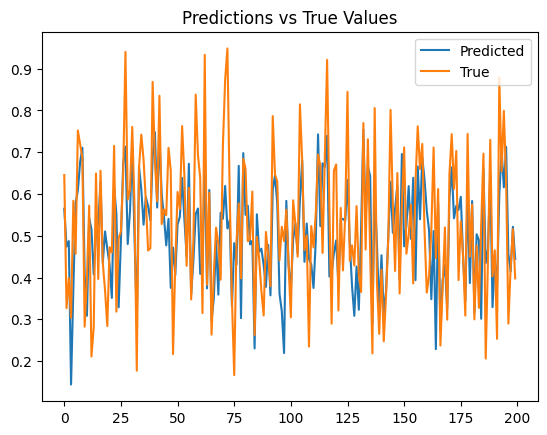

Mean Squared Error: 0.016388023412543338
Mean Absolute Error: 0.10104077697576319
R² Score: 0.4356607503384434


In [1]:
# import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# carregando os dados
data = pd.read_csv("/content/Energy_consumption.csv")

# convertendo a coluna 'Timestamp' para tipo datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# visualizando os dados
print(data.head())

# vividindo dados em conjunto de treinamento e teste
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# pegando apenas as colunas numéricas para normalização
numeric_columns = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']
train_data_numeric = train_data[numeric_columns]
test_data_numeric = test_data[numeric_columns]

# normalizando os dados
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data_numeric)
test_data_normalized = scaler.transform(test_data_numeric)

# separando as features e o target
X_train = train_data_normalized[:, :-1]
y_train = train_data_normalized[:, -1]
X_test = test_data_normalized[:, :-1]
y_test = test_data_normalized[:, -1]

# modelo de rede neural simples com o Keras
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.2),  # regularização dropout
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# compilação
model.compile(optimizer='adam', loss='mse')

# treinamento
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# avaliação do modelo no conjunto de teste
loss = model.evaluate(X_test, y_test)

# previsões
predictions = model.predict(X_test)

# plot das previsões
plt.plot(predictions, label='previsto')
plt.plot(y_test, label='real')
plt.title('predições vs. valores reais')
plt.legend()
plt.show()

# métricas de desempenho adicionais
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('erro quadrático médio:', mse)
print('erro médio absoluto:', mae)
print('pontuação R²:', r2)
